# NAIVE     BAYES  :-

## NAIVE BAYES ALGO APPLY WHEN CONDITIONALLY  PROBALITY FOUND  & DATA IN TEXT FORM

In [1]:
import pandas as pd

In [2]:
df = pd.read_table('Restaurant_Reviews.tsv')

In [3]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


## Naive bayes Algo apply when conditional probality found & data in text form...

In [4]:
x = df.Review    #input
y = df.Liked     #output

In [5]:
y.head

<bound method NDFrame.head of 0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64>

In [6]:
x.head()

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object

In [7]:
x.shape

(1000,)

In [8]:
y.shape

(1000,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.005,random_state=5)

In [11]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((995,), (995,), (5,), (5,))

In [12]:
x_train

653    Not much flavor to them, and very poorly const...
643    Maybe if they weren't cold they would have bee...
763                      But the service was beyond bad.
198                                 Very friendly staff.
721    The chicken was deliciously seasoned and had t...
                             ...                        
400                 This one is simply a disappointment.
118        Kind of hard to mess up a steak but they did.
701          I wasn't really impressed with Strip Steak.
206    I've lived here since 1979 and this was the fi...
867     For sushi on the Strip, this is the place to go.
Name: Review, Length: 995, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import numpy as np

# Use TfidVectorizer()

In [14]:
cv = TfidfVectorizer()

In [15]:
#  TFidvectorizer() library used to converts text into float form & 
#  CounterVectorizer() Library also same works,
# But it converts text to numeric integer form
# CounterVectorizer() only works count,
# but Tfidvectorizer()  it words count & \
# also obtain important word score.

In [16]:
# toarray() used for converts data in array format
cv_train = cv.fit_transform(x_train).toarray()
cv_test = cv.transform(x_test).toarray()

In [17]:
cv_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
cv_test.shape

(5, 2031)

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
nb=MultinomialNB()

In [21]:
nb.fit(cv_train,y_train)

MultinomialNB()

In [22]:
y_pred = nb.predict(cv_test)
y_pred

array([0, 1, 1, 0, 0], dtype=int64)

In [23]:
y_test

544    0
515    1
193    1
11     0
279    0
Name: Liked, dtype: int64

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_pred)       #check accuracy

1.0

In [26]:
print ('Wrong Prediction out of Total' )
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()+(y_test!=y_pred).sum()))

Wrong Prediction out of Total
0 / 5


In [27]:
# use confusion metrics

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm=confusion_matrix(y_pred,y_test)

In [30]:
cm

array([[3, 0],
       [0, 2]], dtype=int64)

In [31]:
#   plot   Confusion  Metrics

In [32]:
import seaborn as sb
import matplotlib.pyplot as plt

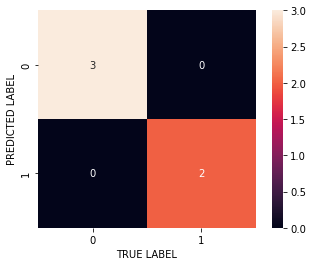

In [33]:
sb.heatmap(cm,annot=True,square=True,fmt='d')
plt.xlabel('TRUE LABEL')
plt.ylabel('PREDICTED LABEL')
plt.show()

In [34]:
print(nb.score(cv_train,y_train))
print(nb.score(cv_test,y_test))

0.963819095477387
1.0


In [35]:
# USe CountVectorizer()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
co = CountVectorizer()

In [38]:
co_train = co.fit_transform(x_train).toarray()
co_test  = co.transform(x_test).toarray()

In [39]:
co_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
nm = MultinomialNB()              #new model  of using CountVectorizer

In [41]:
nm.fit(co_train,y_train)

MultinomialNB()

In [42]:
y_pred = nb.predict(co_test)
y_pred

array([0, 1, 1, 0, 0], dtype=int64)

In [43]:
y_test

544    0
515    1
193    1
11     0
279    0
Name: Liked, dtype: int64

In [44]:
accuracy_score(y_test,y_pred)

1.0

# TENNIS MODEL :-

In [45]:
data = pd.read_csv('Tennis.csv')

In [46]:
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
lb = LabelEncoder()

In [49]:
y = lb.fit_transform(data.iloc[:,-1])

In [50]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [51]:
x = data.iloc[:,0:4]

In [52]:
x

,outlook,temp,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [53]:
x = pd.get_dummies(x)
x

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,False,0,0,1,0,1,0,1,0
1,True,0,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,1,0,0,0,1,1,0
4,False,0,1,0,1,0,0,0,1
5,True,0,1,0,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,0,1,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
9,False,0,1,0,0,0,1,0,1


In [54]:
x['windy']=x.windy.astype(int)

In [55]:
x

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0
4,0,0,1,0,1,0,0,0,1
5,1,0,1,0,1,0,0,0,1
6,1,1,0,0,1,0,0,0,1
7,0,0,0,1,0,0,1,1,0
8,0,0,0,1,1,0,0,0,1
9,0,0,1,0,0,0,1,0,1


In [56]:
x= x.values

In [57]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9, 9), (5, 9), (9,), (5,))

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
nb = MultinomialNB()

In [63]:
nb.fit(x_train,y_train)

MultinomialNB()

In [64]:
y_pred = nb.predict(x_test)

In [65]:
y_pred

array([1, 0, 1, 1, 1])

In [66]:
y_test

array([1, 0, 1, 1, 1])

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test,y_pred)

1.0

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
cm = confusion_matrix(y_test,y_pred)

In [71]:
cm

array([[1, 0],
       [0, 4]], dtype=int64)

In [72]:
nb.score(x_train,y_train)

0.7777777777777778

In [73]:
nb.score(x_test,y_test)

1.0

# TITANIC DATSET :-

In [75]:
data = pd.read_csv('titanic.csv')

In [76]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
x = data.drop(['Survived','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [80]:
x

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [81]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [82]:
x.shape

(891, 4)

In [85]:
x1 = x.dropna(how='all')           # USE FOR ALL NAN VALUES RECORD DELETE

In [91]:
x.Age = x.Age.fillna(x.Age.mean())              # fill nan value  to Age mean()

In [92]:
x.Age.isnull().sum()

0

In [95]:
x.Sex.unique()          # unique name

array(['male', 'female'], dtype=object)

In [96]:
x.Sex = x.Sex.map({'male':0,'female':1})

In [97]:
x

,Pclass,Sex,Age,Fare
0,3,0,22.000000,7.2500
1,1,1,38.000000,71.2833
2,3,1,26.000000,7.9250
3,1,1,35.000000,53.1000
4,3,0,35.000000,8.0500
...,...,...,...,...
886,2,0,27.000000,13.0000
887,1,1,19.000000,30.0000
888,3,1,29.699118,23.4500
889,1,0,26.000000,30.0000


In [101]:
y = data.loc[:,'Survived'].values              #change into 1d array to pass output in model

In [102]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [103]:
from sklearn.preprocessing import StandardScaler       #Use for feature Scaling 

In [104]:
sc = StandardScaler()

In [107]:
x = sc.fit_transform(x)
x

array([[ 8.27377244e-01, -7.37695132e-01, -5.92480600e-01,
        -5.02445171e-01],
       [-1.56610693e+00,  1.35557354e+00,  6.38789012e-01,
         7.86845294e-01],
       [ 8.27377244e-01,  1.35557354e+00, -2.84663197e-01,
        -4.88854258e-01],
       ...,
       [ 8.27377244e-01,  1.35557354e+00, -2.23290646e-16,
        -1.76263239e-01],
       [-1.56610693e+00, -7.37695132e-01, -2.84663197e-01,
        -4.43810379e-02],
       [ 8.27377244e-01, -7.37695132e-01,  1.77062908e-01,
        -4.92377828e-01]])

In [114]:
from sklearn.model_selection import train_test_split              # DATA SPLIT AND DIVIDES 

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [117]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((623, 4), (623,), (268, 4), (268,))

In [118]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
model = MultinomialNB()
model.fit(x_train,y_train)             # NOT TRAIN BECAUSE NEGATIVE VALUES NOT PASSED

ValueError: Negative values in data passed to MultinomialNB (input X)

# USING NORMALIZATION : -

In [180]:
from sklearn.preprocessing import MinMaxScaler   #Using Normalization
sc = MinMaxScaler(feature_range=(0,1))

In [181]:
x  = sc.fit_transform(x)

In [182]:
x

array([[1.        , 0.        , 0.27117366, 0.01415106],
       [0.        , 1.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [1.        , 1.        , 0.36792055, 0.04577135],
       [0.        , 0.        , 0.32143755, 0.0585561 ],
       [1.        , 0.        , 0.39683338, 0.01512699]])

In [183]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [200]:
x_train,x_test,y_train,y_test = train_test_split(   x,y,test_size=0.23,   random_state=7  )

In [201]:
x_train

array([[1.        , 1.        , 0.24604172, 0.01917712],
       [0.        , 0.        , 0.35913546, 0.12999454],
       [0.        , 0.        , 0.59788892, 0.14976542],
       ...,
       [0.        , 1.        , 0.37170143, 0.20772777],
       [1.        , 0.        , 0.36792055, 0.01512699],
       [1.        , 0.        , 0.22090978, 0.01533038]])

In [202]:
model.fit(x_train,y_train)

MultinomialNB()

In [203]:
y_pred=model.predict(x_test)

In [204]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [205]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [206]:
np.where(y_pred!=y_test)

(array([  5,  20,  22,  23,  25,  27,  34,  36,  41,  54,  56,  58,  59,
         64,  66,  67,  68,  70,  80,  81,  88,  90,  91,  93,  96, 105,
        115, 123, 126, 128, 130, 133, 135, 136, 137, 138, 140, 141, 147,
        148, 151, 158, 161, 162, 164, 166, 171, 172, 175, 179, 191, 194,
        197, 202, 204], dtype=int64),)

In [207]:
accuracy_score(y_test,y_pred)

0.7317073170731707